In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

In [2]:
df = pd.read_csv(r'C:\Users\Sarthak\Desktop\MCAFinalYearProjectMachineLearning\Heartdata.csv')
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [3]:
df.describe(include='all')

Age  Sex ChestPainType   RestingBP  Cholesterol   FastingBS  \
count   918.000000  918           918  918.000000   918.000000  918.000000   
unique         NaN    2             4         NaN          NaN         NaN   
top            NaN    M           ASY         NaN          NaN         NaN   
freq           NaN  725           496         NaN          NaN         NaN   
mean     53.510893  NaN           NaN  132.396514   198.799564    0.233115   
std       9.432617  NaN           NaN   18.514154   109.384145    0.423046   
min      28.000000  NaN           NaN    0.000000     0.000000    0.000000   
25%      47.000000  NaN           NaN  120.000000   173.250000    0.000000   
50%      54.000000  NaN           NaN  130.000000   223.000000    0.000000   
75%      60.000000  NaN           NaN  140.000000   267.000000    0.000000   
max      77.000000  NaN           NaN  200.000000   603.000000    1.000000   

       RestingECG       MaxHR ExerciseAngina     Oldpeak ST_Slope  \
count         918  918.000000            918  918.000000      918   
unique          3         NaN              2         NaN        3   
top        Normal         NaN              N         NaN     Flat   
freq          552         NaN            547         NaN      460   
mean          NaN  136.809368            NaN    0.887364      NaN   
std           NaN   25.460334            NaN    1.066570      NaN   
min           NaN   60.000000            NaN   -2.600000      NaN   
25%           NaN  120.000000            NaN    0.000000      NaN   
50%           NaN  138.000000            NaN    0.600000      NaN   
75%           NaN  156.000000            NaN    1.500000      NaN   
max           NaN  202.000000            NaN    6.200000      NaN   

        HeartDisease  
count     918.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.553377  
std         0.497414  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         1.000000  
max         1.000000

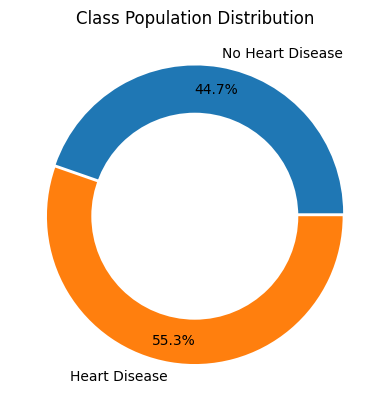

In [4]:
# Map targets to meaningful statements
classes = {
    'No Heart Disease': 0,
    'Heart Disease': 1
}
# Find the number of patients with/without heart disease
class_pop = [len(df[df['HeartDisease'] == _class]) for _class in classes.values()]

# Drawing a donut chart
plt.title('Class Population Distribution')
plt.pie(
    x=class_pop,
    labels=classes.keys(),
    autopct='%.1f%%',
    explode=[0.02, 0],
    pctdistance=0.85
)
center_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.savefig('Class Population.jpg', dpi=300)
plt.show()

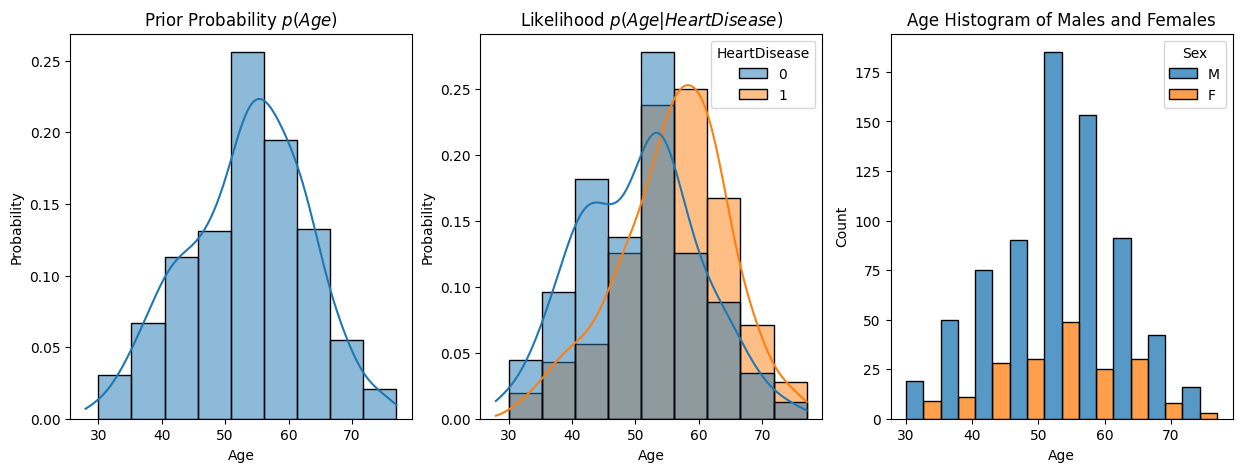

In [5]:
# Plotting multiple diagrams to figure out the distribution of age and also risk of heart disease in different ages
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Prior Probability $p(Age)$')
sns.histplot(
    data=df, x='Age',
    kde=True,
    binwidth=5, binrange=(30, df['Age'].max()),
    stat='probability', common_norm=False,
    ax=axes[0]
)

plt.subplot(1, 3, 2)
plt.title(r'Likelihood $p(Age|HeartDisease)$')
sns.histplot(
    data=df, x='Age',
    kde=True,
    binwidth=5, binrange=(30, df['Age'].max()),
    hue='HeartDisease',
    stat='probability', common_norm=False,
    ax=axes[1]
)

plt.subplot(1, 3, 3)
plt.title('Age Histogram of Males and Females')
sns.histplot(
    data=df, x='Age',
    binwidth=5, binrange=(30, df['Age'].max()),
    hue='Sex',
    multiple='dodge',
    ax=axes[2]
)

plt.savefig('Age.jpg', dpi=300)
plt.show()

Probability Distribution: Normal
Interpretation 1: Patients having heart disease are more likely to be 55-60 years old.

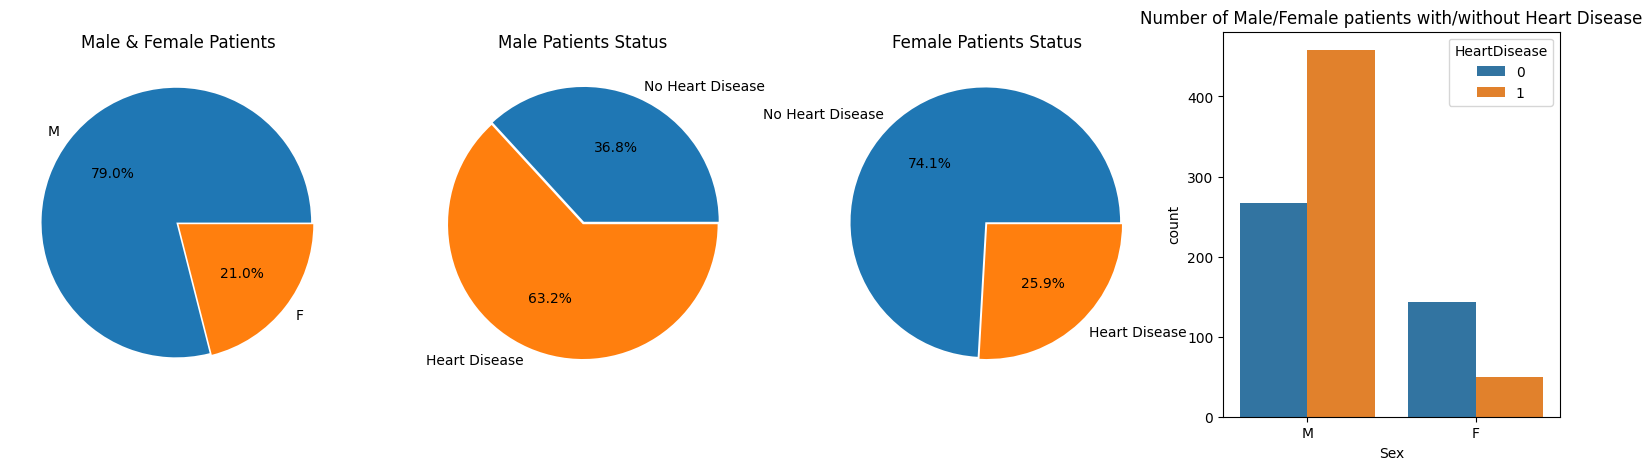

In [6]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

genders = df['Sex'].unique()
gender_pop = [len(df[df['Sex'] == _gender]) for _gender in genders]

plt.subplot(1, 4, 1)
plt.title('Male & Female Patients')
plt.pie(
    x=gender_pop,
    labels=genders,
    autopct='%.1f%%',
    explode=[0.02, 0],
)

# Status of male and female patients
male_stat = [len(df[(df['Sex'] == 'M') & (df['HeartDisease'] == _class)]) for _class in classes.values()]
female_stat = [len(df[(df['Sex'] == 'F') & (df['HeartDisease'] == _class)]) for _class in classes.values()]

plt.subplot(1, 4, 2)
plt.title('Male Patients Status')
plt.pie(
    x=male_stat,
    labels=classes.keys(),
    autopct='%.1f%%',
    explode=[0.02, 0],
)

plt.subplot(1, 4, 3)
plt.title('Female Patients Status')
plt.pie(
    x=female_stat,
    labels=classes.keys(),
    autopct='%.1f%%',
    explode=[0.02, 0],
)

plt.subplot(1, 4, 4)
plt.title('Number of Male/Female patients with/without Heart Disease')
sns.countplot(
    data=df, x='Sex',
    hue='HeartDisease',
    ax=axes[3]
)

plt.savefig('Sex.jpg', dpi=300)
plt.show()

Interpretation 1: The Majority of the patients in the dataset are male Interpretation 2: As opposed to male patients in the dataset, female patients are less prone to heart failures

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

pains = df['ChestPainType'].unique()
pains_pop = [len(df[df['ChestPainType'] == _pain]) for _pain in pains]

plt.subplot(1, 3, 1)
plt.title('Distribution of Chest Pain Types')
plt.pie(
    x=pains_pop,
    labels=pains,
    autopct='%.1f%%',
    explode=0.02 * np.ones(len(pains))
)

plt.subplot(1, 3, 2)
plt.title('Likelihood $p(ChestPainType|HeartDisease)$')
sns.histplot(
    data=df, x='ChestPainType',
    hue='HeartDisease',
    stat='probability', common_norm=False,
    multiple='dodge',
    ax=axes[1]
)

plt.subplot(1, 3, 3)
plt.title('$p(ChestPainType|Sex)$')
sns.histplot(
    data=df, x='ChestPainType',
    hue='Sex',
    stat='probability', common_norm=False,
    multiple='dodge',
    ax=axes[2]
)

plt.savefig('Chest Pain Type.jpg', dpi=300)
plt.show()

Interpretation 1: The majority of patients had chest pain of type 'ASY' while only a few had 'TA'. Since the dataset is balanced with respect to heart disease, we can interpret that if a patient has chest pain of type 'ASY', it is probable that he/she has heart disease.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove patient with RestingBP = 0
df = df[df['RestingBP'] != 0]

# Set Seaborn style
sns.set_style("whitegrid")  # Keeps white background but allows customization

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Prior Probability Plot
sns.kdeplot(data=df, x='RestingBP', ax=axes[0])
axes[0].set_title('Prior Probability $p(RestingBP)$')

# Likelihood Plot (Heart Disease)
sns.kdeplot(data=df, x='RestingBP', hue='HeartDisease', ax=axes[1])
axes[1].set_title('Likelihood $p(RestingBP|HeartDisease)$')

# RestingBP by Sex
sns.kdeplot(data=df, x='RestingBP', hue='Sex', ax=axes[2])
axes[2].set_title('$p(RestingBP|Sex)$')

# **Remove only gridlines**
for ax in axes:
    ax.grid(False)  # Disable grid lines

plt.tight_layout()
plt.savefig('RestingBP.jpg', dpi=300)
plt.show()


Probability Distribution: Normal Interpretation 1: patients suffering from heart disease have a slight more average resting blood pressure. Average blood pressure in male and female patients is the same.

In [9]:
# Cholesterol is not recorded for some patients. Find the number of patients whose cholesterol is not recorded to decide whether to remove records with missing values or not
n_patients = len(df[df['Cholesterol'] == 0])
print(f'Patients for whom cholesterol is not recorded: {n_patients}{os.linesep}Equivalent to {100 * n_patients / len(df):.2f}% of the dataset')

Patients for whom cholesterol is not recorded: 171
Equivalent to 18.65% of the dataset


In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.set_style("whitegrid")
plt.subplot(1, 3, 1)
plt.title('PDF of Cholesterol Before Preprocessing')
sns.kdeplot(
    data=df, x='Cholesterol',
    hue='Sex',
    ax=axes[0]
)

# Fill cholesterol for patients whose cholesterol is not recorded -> strategy: mean
# Calculate the mean cholesterol for male and female separately and replace with 0s in the data
df_filled = df.copy()
df_filled.loc[(df['Cholesterol'] == 0) & (df['Sex'] == 'M'), 'Cholesterol'] = df.loc[
    (df['Cholesterol'] != 0) & (df['Sex'] == 'M'), 'Cholesterol'].mean()

df_filled.loc[(df['Cholesterol'] == 0) & (df['Sex'] == 'F'), 'Cholesterol'] = df.loc[
    (df['Cholesterol'] != 0) & (df['Sex'] == 'F'), 'Cholesterol'].mean()

plt.subplot(1, 3, 2)
plt.title('PDF of Cholesterol After Preprocessing')
sns.kdeplot(
    data=df_filled, x='Cholesterol',
    hue='Sex',
    ax=axes[1]
)

plt.subplot(1, 3, 3)
plt.title('Likelihood $p(cholesterol|HeartDisease)$')
sns.kdeplot(
    data=df_filled, x='Cholesterol',
    hue='HeartDisease',
    ax=axes[2]
)

plt.savefig('Cholesterol.jpg', dpi=300)
plt.show()

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_18188\1706048420.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '241.04078014184398' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_filled.loc[(df['Cholesterol'] == 0) & (df['Sex'] == 'M'), 'Cholesterol'] = df.loc[


Probability Distribution: Normal Interpretation 1: Male and female patients have quite the same average cholesterol. Interpretation 2: Patients suffering from heart disease have slightly more average cholesterol

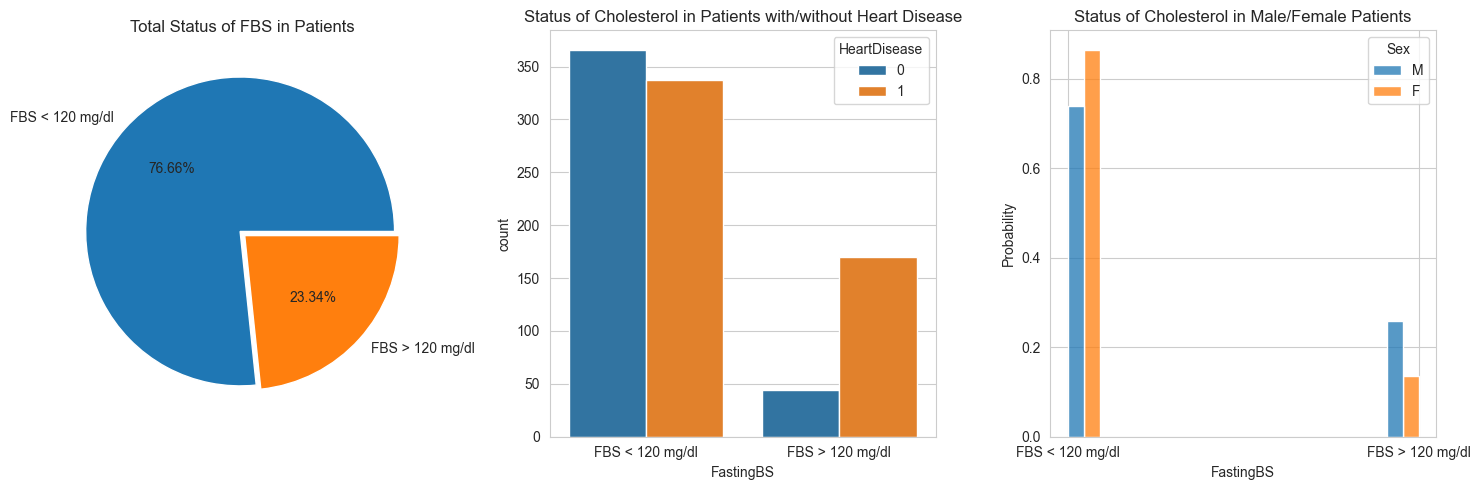

In [11]:
# As mentioned in 'Dataset Specifications' section, this is a categorical feature that has only two possible values. 0 indicates that FBS of patient is less than 120 mg/dl and 1 indicates that FBS is greater than 120 mg/dl
FBS_classes = {
    'FBS < 120 mg/dl': 0,
    'FBS > 120 mg/dl': 1
}

FBS_pop = [len(df_filled[df_filled['FastingBS'] == _fbs]) for _fbs in FBS_classes.values()]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Total Status of FBS in Patients')
plt.pie(
    x=FBS_pop,
    labels=FBS_classes.keys(),
    autopct='%.2f%%',
    explode=0.02 * np.ones(len(FBS_classes))
)

plt.subplot(1, 3, 2)
plt.title('Status of Cholesterol in Patients with/without Heart Disease')
sns.countplot(
    data=df_filled, x='FastingBS',
    hue='HeartDisease',
    ax=axes[1]
)
plt.xticks([0, 1], FBS_classes.keys())

plt.subplot(1, 3, 3)
plt.title('Status of Cholesterol in Male/Female Patients')
sns.histplot(
    data=df_filled, x='FastingBS',
    hue='Sex',
    stat='probability', common_norm=False,
    multiple='dodge',
    ax=axes[2]
)
plt.xticks([0, 1], FBS_classes.keys())

plt.tight_layout()
plt.savefig('FastingBS.jpg', dpi=300)
plt.show()

Interpretation 1: The majority of patients in the dataset have FBS < 120 mg/dl Interpretation 2: Patients having heart disease are more likely to have FBS > 120 mg/dl

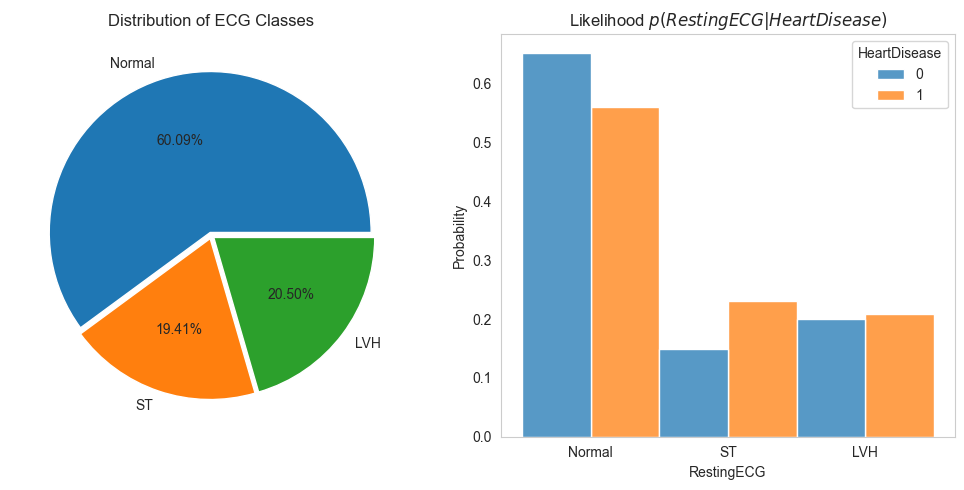

In [12]:


ECG_Classes = ['Normal', 'ST', 'LVH']
ECG_pop = [len(df_filled[df_filled['RestingECG'] == _ecg]) for _ecg in ECG_Classes]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# **ECG Class Distribution Pie Chart**
plt.subplot(1, 2, 1)
plt.title('Distribution of ECG Classes')
plt.pie(
    x=ECG_pop,
    labels=ECG_Classes,
    autopct='%.2f%%',
    explode=0.02 * np.ones(len(ECG_Classes))
)
plt.gca().grid(False)  # Removes grid from pie chart

# **Likelihood Plot for RestingECG & Heart Disease**
sns.histplot(
    data=df_filled, x='RestingECG',
    hue='HeartDisease',
    stat='probability', common_norm=False,
    multiple='dodge',
    ax=axes[1]
)
axes[1].set_title('Likelihood $p(RestingECG|HeartDisease)$')
axes[1].grid(False)  # Removes grid from histogram

plt.tight_layout()
plt.savefig('RestingECG.jpg', dpi=300)
plt.show()


Interpretation 1: Resting ECG results are normal for 60% of patients in the dataset

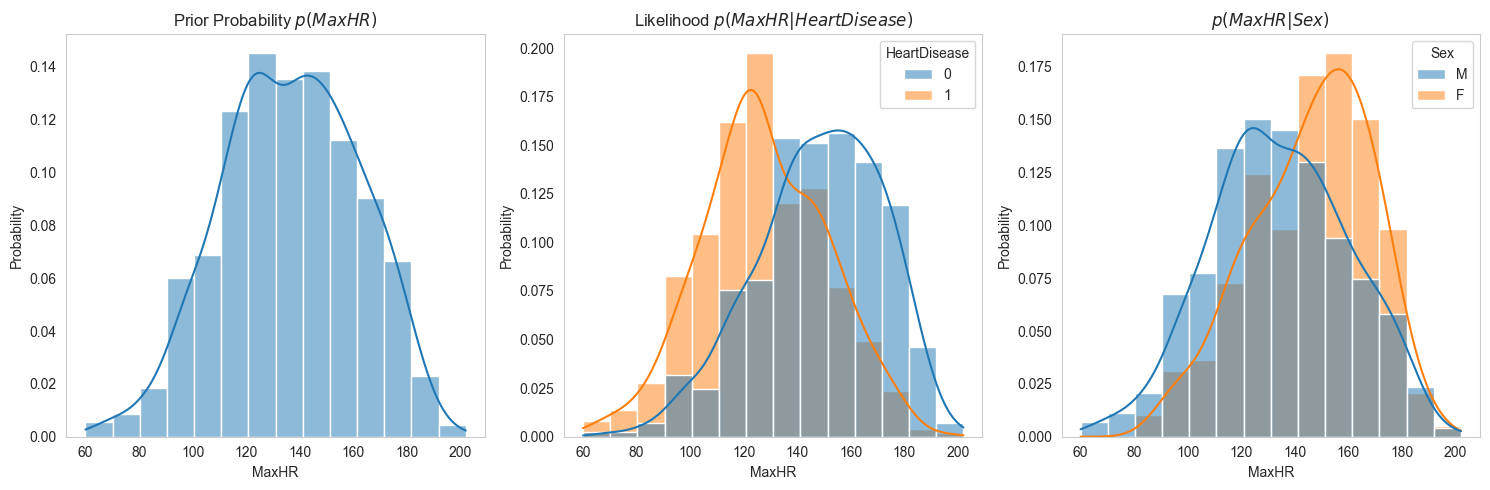

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Prior Probability $p(MaxHR)$')
sns.histplot(
    data=df, x='MaxHR',
    kde=True,
    binwidth=10,
    stat='probability', common_norm=False,
    ax=axes[0]
)
axes[0].grid(False)
plt.subplot(1, 3, 2)
plt.title('Likelihood $p(MaxHR|HeartDisease)$')
sns.histplot(
    data=df, x='MaxHR',
    kde=True,
    binwidth=10,
    hue='HeartDisease',
    stat='probability', common_norm=False,
    ax=axes[1]
)
axes[1].grid(False)
plt.subplot(1, 3, 3)
plt.title('$p(MaxHR|Sex)$')
sns.histplot(
    data=df, x='MaxHR',
    kde=True,
    binwidth=10,
    hue='Sex',
    stat='probability', common_norm=False,
    ax=axes[2]
)
axes[2].grid(False)
plt.tight_layout()
plt.savefig('MaxHR.jpg', dpi=300)
plt.show()

Probability Distribution: Normal Interpretation 1: Female patients appear to have higher average heart rate than male patients

In [14]:
angina_classes = {
    'Yes': 'Y',
    'No': 'N'
}

# Status of ExerciseAngina for male and female patients
m_angina = [len(df_filled[(df_filled['Sex'] == 'M') & (df_filled['ExerciseAngina'] == _angina)]) for _angina in
            angina_classes.values()]
f_angina = [len(df_filled[(df_filled['Sex'] == 'F') & (df_filled['ExerciseAngina'] == _angina)]) for _angina in
            angina_classes.values()]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Exercise-Induced Angina: Male')
plt.pie(
    x=m_angina,
    labels=angina_classes.keys(),
    autopct='%.2f%%',
    explode=0.02 * np.ones(len(angina_classes.keys()))
)

plt.subplot(1, 3, 2)
plt.title('Exercise-Induced Angina: Female')
plt.pie(
    x=f_angina,
    labels=angina_classes.keys(),
    autopct='%.2f%%',
    explode=0.02 * np.ones(len(angina_classes.keys()))
)

plt.subplot(1, 3, 3)
plt.title('Likelihood $p(ExerciseAngina|HeartDisease)$')
sns.histplot(
    data=df_filled, x='ExerciseAngina',
    hue='HeartDisease',
    stat='probability', common_norm=False,
    multiple='dodge',
    ax=axes[2]
)

plt.tight_layout()
plt.savefig('ExerciseAngina.jpg', dpi=300)
plt.show()

Interpretation 1: Female patients seem to have more physical strength than male patients since the mojarity of them do not experience discomfort after physical activities. Interpretation 2: According to likelihood function, a patient suffering from heart disease s more probable to experience difficulty and discomfort after exercise or physical activity.

Old Peak

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Prior Probability $p(Oldpeak)$')
sns.kdeplot(
    data=df_filled, x='Oldpeak',
    ax=axes[0]
)

plt.subplot(1, 2, 2)
plt.title('Likelihood $p(Oldpeak|HeartDisease)$')
sns.kdeplot(
    data=df_filled, x='Oldpeak',
    hue='HeartDisease',
    ax=axes[1]
)

plt.tight_layout()
plt.savefig('Oldpeak.jpg', dpi=300)
plt.show()

Probability Distribution: Malformed Gaussian Interpretation 1: Patients suffering from heart disease are more likely to have and old peak that is deviated from 0.

ST Slope

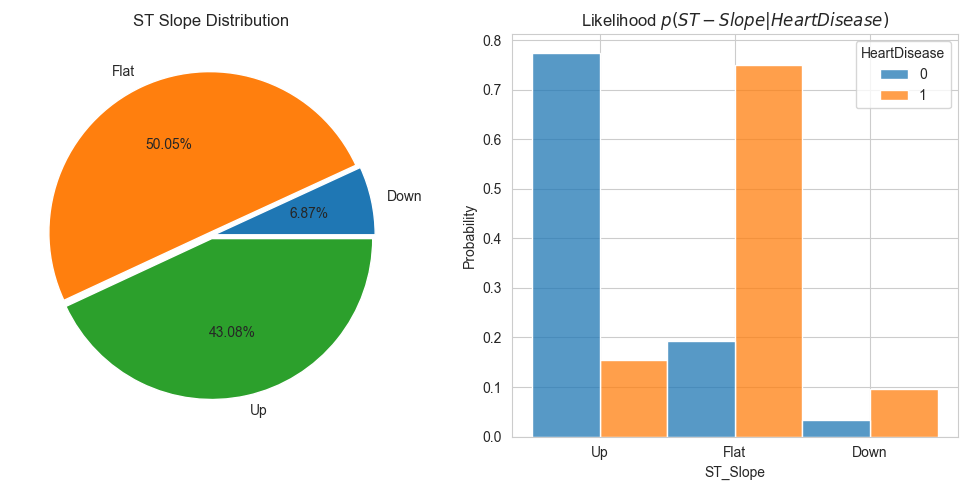

In [16]:
slope_classes = ['Down', 'Flat', 'Up']
slope_pop = [len(df_filled[df_filled['ST_Slope'] == _slope]) for _slope in slope_classes]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('ST Slope Distribution')
plt.pie(
    x=slope_pop,
    labels=slope_classes,
    autopct='%.2f%%',
    explode=0.02 * np.ones(len(slope_classes))
)

plt.subplot(1, 2, 2)
plt.title('Likelihood $p(ST-Slope|HeartDisease)$')
sns.histplot(
    data=df_filled, x='ST_Slope',
    hue='HeartDisease',
    stat='probability', common_norm=False,
    multiple='dodge',
    ax=axes[1]
)

plt.tight_layout()
plt.savefig('ST Slope.jpg', dpi=300)
plt.show()

Interpretation 1: Since we are dealing with a balanced dataset with respect to heart disease, we can say that if ST slope for a patient is flat, there is a high risk of heart failure.

Stage 5: Handling Categorical Features

In [17]:
# In order to convert categorical features to numerical features we use Label-Encoding Approach. So we map each category to an integer.
df_filled['Sex'] = df_filled['Sex'].replace(['M', 'F'], [0, 1])
df_filled['ChestPainType'] = df_filled['ChestPainType'].replace(['ATA', 'NAP', 'ASY', 'TA'], [0, 1, 2, 3])
df_filled['RestingECG'] = df_filled['RestingECG'].replace(['Normal', 'ST', 'LVH'], [0, 1, 2])
df_filled['ExerciseAngina'] = df_filled['ExerciseAngina'].replace(['N', 'Y'], [0, 1])
df_filled['ST_Slope'] = df_filled['ST_Slope'].replace(['Up', 'Flat', 'Down'], [0, 1, 2])


C:\Users\Sarthak\AppData\Local\Temp\ipykernel_18188\154887430.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filled['Sex'] = df_filled['Sex'].replace(['M', 'F'], [0, 1])
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_18188\154887430.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filled['ChestPainType'] = df_filled['ChestPainType'].replace(['ATA', 'NAP', 'ASY', 'TA'], [0, 1, 2, 3])
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_18188\154887430.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and wi

In [18]:
df_filled.head(20)

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0    40    0              0        140        289.0          0           0   
1    49    1              1        160        180.0          0           0   
2    37    0              0        130        283.0          0           1   
3    48    1              2        138        214.0          0           0   
4    54    0              1        150        195.0          0           0   
5    39    0              1        120        339.0          0           0   
6    45    1              0        130        237.0          0           0   
7    54    0              0        110        208.0          0           0   
8    37    0              2        140        207.0          0           0   
9    48    1              0        120        284.0          0           0   
10   37    1              1        130        211.0          0           0   
11   58    0              0        136        164.0          0           1   
12   39    0              0        120        204.0          0           0   
13   49    0              2        140        234.0          0           0   
14   42    1              1        115        211.0          0           1   
15   54    1              0        120        273.0          0           0   
16   38    0              2        110        196.0          0           0   
17   43    1              0        120        201.0          0           0   
18   60    0              2        100        248.0          0           0   
19   36    0              0        120        267.0          0           0   

    MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0     172               0      0.0         0             0  
1     156               0      1.0         1             1  
2      98               0      0.0         0             0  
3     108               1      1.5         1             1  
4     122               0      0.0         0             0  
5     170               0      0.0         0             0  
6     170               0      0.0         0             0  
7     142               0      0.0         0             0  
8     130               1      1.5         1             1  
9     120               0      0.0         0             0  
10    142               0      0.0         0             0  
11     99               1      2.0         1             1  
12    145               0      0.0         0             0  
13    140               1      1.0         1             1  
14    137               0      0.0         0             0  
15    150               0      1.5         1             0  
16    166               0      0.0         1             1  
17    165               0      0.0         0             0  
18    125               0      1.0         1             1  
19    160               0      3.0         1             1

Stage 6: Splitting Data to Train, Validation and Test Subsets

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Assuming df_filled is preprocessed
X = df_filled.drop(['HeartDisease'], axis=1)
y = df_filled['HeartDisease']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Standardization for models that require scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Models to train
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC()
}

# Training and evaluation
for name, model in models.items():
    # Use scaled data where required
    if name in ["Logistic Regression", "KNN", "SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_val_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_val, y_pred))
    print("-" * 50)

# Test on unseen data (optional)
best_model = models["Random Forest"] 
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy of Best Model: {test_accuracy:.4f}")




Logistic Regression Accuracy: 0.8696
              precision    recall  f1-score   support

           0       0.87      0.80      0.83        56
           1       0.87      0.91      0.89        82

    accuracy                           0.87       138
   macro avg       0.87      0.86      0.86       138
weighted avg       0.87      0.87      0.87       138

--------------------------------------------------
Decision Tree Accuracy: 0.7609
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        56
           1       0.85      0.73      0.78        82

    accuracy                           0.76       138
   macro avg       0.76      0.77      0.76       138
weighted avg       0.77      0.76      0.76       138

--------------------------------------------------
Random Forest Accuracy: 0.8841
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        56
           1       0.88      0.93   

In [20]:
rfr=RandomForestClassifier()
rfr.fit(X_train,y_train)

rfr.predict(X_test)

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0])

Stage 7: Feature Scaling & Normalization

In [21]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset (assuming df_filled is preprocessed)
X = df_filled.drop(['HeartDisease'], axis=1)
y = df_filled['HeartDisease']

# Split data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
rf_tuned.fit(X_train, y_train)

# Best model
best_rf = rf_tuned.best_estimator_

# Save the model
with open(r"C:\Users\Sarthak\Desktop\MCAFinalYearProjectMachineLearning\heart_disease_rf_model.pkl", "wb") as file:
    pickle.dump(best_rf, file)

In [26]:


# Function to predict heart disease
def predict_heart_disease(input_data):
    with open(r"C:\Users\Sarthak\Desktop\MCAFinalYearProjectMachineLearning\heart_disease_rf_model.pkl", "rb") as file:
        model = pickle.load(file)

    # Convert input data to numpy array and reshape for prediction
    features = np.array([input_data]).reshape(1, -1)
    
    # Predict
    prediction = model.predict(features)
    
    return "Heart Disease Detected" if prediction[0] == 1 else "No Heart Disease"

# Example Test Case
test_input = [42,1,	1,115,211.0,0,1,137,0,0.0,0]  # Example patient data
result = predict_heart_disease(test_input)
print(result)


No Heart Disease


c:\Users\Sarthak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [23]:

y_pred = best_rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 86.96%
